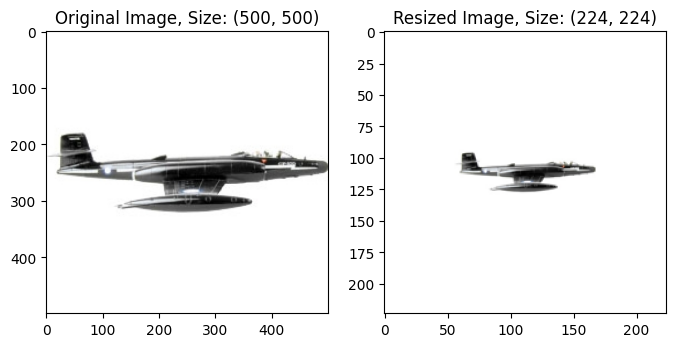

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# image arguments
IMAGE_H = 224
IMAGE_W = 224

def resize_object_img(img_filename):

    img = Image.open(img_filename)
    img = img.resize((int(IMAGE_W / 2), int(IMAGE_H / 2)), Image.BICUBIC)
    new_img = Image.new('RGB', (IMAGE_W, IMAGE_H), 'white')
    # paste on a white background
    new_img.paste(img, (int(IMAGE_W / 4), int(IMAGE_H / 4)))

    return new_img

img_filename = '/home/Dataset/xueyi/KonkLab/17-objects/airplane/AFIGHTP35.jpg'
img = Image.open(img_filename)
new_img = resize_object_img(img_filename) 

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img)
ax[0].set_title(f'Original Image, Size: {img.size}')
ax[1].imshow(new_img)
ax[1].set_title(f'Resized Image, Size: {new_img.size}')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


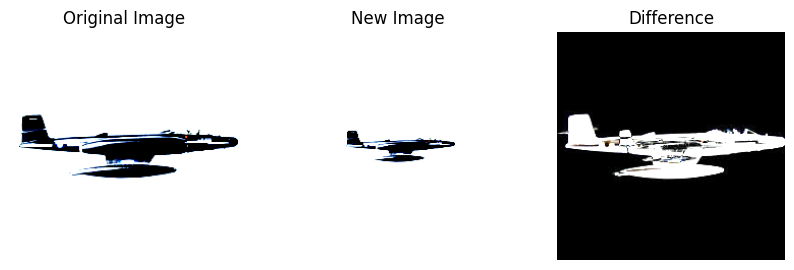

In [6]:
from torchvision import transforms
import torch

preprocess = transforms.Compose([
    transforms.Resize((224, 224),
                        interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

img = preprocess(img)
new_img = preprocess(new_img)
difference = torch.abs(img - new_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img.permute(1, 2, 0))  # 如果是标准的torch张量(C,H,W)，需要变换为(H,W,C)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(new_img.permute(1, 2, 0))
plt.title('New Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference.permute(1, 2, 0))
plt.title('Difference')
plt.axis('off')

plt.show()